# Predicting the Condition of Tanzanian Water Wells: A Machine Learning Approach to Maintenance and Sustainability

<img src="https://www.shutterstock.com/image-photo/abuja-nigeria-august-02-2021-600nw-2018049758.jpg" style="width:100%; height:auto;">

# Business Understanding

## Project Overview

Tanzania, with a population of over 57 million, faces significant challenges in providing reliable access to clean water, particularly in rural areas where approximately 70% of the population resides. Many water wells, essential for communities, are either in disrepair or have failed. According to the Tanzanian Ministry of Water, over 40% of water points are non-functional and in need of repair.

Despite ongoing efforts by the government and NGOs, the country struggles with limited resources for the maintenance and monitoring of its water wells. A large portion of these wells require constant monitoring, but the current manual inspection methods are inefficient. Only about 10,000 wells out of the 40,000 requiring repair are inspected annually, leading to many wells being unmonitored for extended periods.

A predictive model based on available data such as pump type, installation year, maintenance records, and geographical location could greatly improve the speed and accuracy of identifying wells in need of repair. This model would help stakeholders prioritize repairs, ultimately ensuring continued access to clean water for rural communities.

## Problem Statement

Tanzania’s water infrastructure faces significant challenges, with many water wells either at risk of failure or in need of repair. The current monitoring system relies on manual inspections, which are slow and inefficient. With approximately 40% of the country's water wells non-functional, there is an urgent need for an efficient, data-driven approach to predict which wells are most likely to fail.

Existing manual methods inspect only a fraction of the wells annually, leaving many communities without access to safe water. Each failed well can impact between 500-1,000 people, contributing to water scarcity and health risks.

A predictive model is needed to help identify wells at risk of failure, enabling timely interventions to ensure continued access to clean water.

## Objectives

### Main Objective
To develop a machine learning classifier that predicts the condition of water wells in Tanzania based on available features such as pump type, installation year, maintenance history, and geographical location.

### Specific Objectives
1. To preprocess the provided historical data related to water wells, ensuring it is clean and ready for model training.
2. To analyze the dataset to identify important features and understand the relationships between variables that influence well conditions.
3. To train and evaluate at least three classification models (Logistic Regression as a baseline, Decision Tree before tuning, and Hyper-tuned Decision Trees) to determine the best-performing model for predicting well conditions.
4. To optimize the selected model's performance by tuning hyperparameters and improving classification metrics such as accuracy, precision, recall, and F1 score.

## Success Criteria

- **Accuracy**: The model should achieve an accuracy score of 75% or higher, meaning it correctly predicts the condition of water wells in at least 75% of cases.
- **Precision**: The model should aim for a precision score of 75%, ensuring that when it predicts a well needs repair, it is correct 75% of the time.
- **Recall**: The model should aim for a recall score of 75%, ensuring that it identifies 75% of wells in need of repair.
- **F1 Score**: A balanced F1 score above 0.75 is expected, reflecting a good balance between precision and recall in identifying wells needing repair.
ll in identifying wells needing repair.


# Data Understanding
Import the relevant libraries 

In [324]:
# Relevant libraries
import nbimporter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statsmodels.tools.tools import add_constant
from sklearn.decomposition import PCA
import plotly.express as px
from statsmodels.tsa.stattools import adfuller
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve


### 1. Load the data
There are three datasets: train_values, train_labels and test_values

In [326]:
# To avail the classes notebook
%run Phase_3_Project_Classes.ipynb
# Loading the data for the 3 datasets
data_understanding = DataUnderstanding('Raw Data/Train set values.csv', 'Raw Data/Train set labels.csv', 'Raw Data/Test set values.csv')


### 2. Examine the basic properties

The basic properties of a dataset provide a snapshot of its structure, including the first few rows, the number of rows and columns (shape), the general information of the dataframes including data types and non-null values in each column, and a list of all the column names.

#### Train_values

In [330]:
# basic properties of train_values
data_understanding.basic_properties_dataframe(data_understanding.train_values, name="Train Values")


Train Values - First 5 Rows:
------------------------------
      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... payment_type  \
0  34.938093  -9.856322                  none            0  ...     annually   
1  34.698766  -2.147466              Zahanati            0  ...    never pay   
2  37.460664  -3.821329           Kwa Mahundi            0  ...   per bucket   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...    never pay   
4  31.130847  -1.825359               Shuleni            0  ...    nev

#### Train_labels

In [332]:
# basic properties of train labels
data_understanding.basic_properties_dataframe(data_understanding.train_labels, name="Train Labels")



Train Labels - First 5 Rows:
------------------------------
      id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional

Train Labels - Shape:
------------------------------
Rows: 59400, Columns: 2

Train Labels - Info:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB

Train Labels - Columns:
------------------------------
['id', 'status_group']


#### Test_values

In [334]:
# basic properties of test values
data_understanding.basic_properties_dataframe(data_understanding.test_values, name="Test Values")


Test Values - First 5 Rows:
------------------------------
      id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

   ... payment_type water_qualit

### 3. Summary Statistics for the datasets

The summarize_statistics function provides an overview of the key statistical properties of the dataset, including summary statistics for numerical columns and frequency counts for categorical columns.

#### Train_values

In [338]:
# statical summary of train values
data_understanding.summarize_statistics(data_understanding.train_values, name="Train Values")


Train Values - Summary Statistics:
------------------------------

Train Values - Numerical Columns Summary:
------------------------------
                 id     amount_tsh    gps_height     longitude      latitude  \
count  59400.000000   59400.000000  59400.000000  59400.000000  5.940000e+04   
mean   37115.131768     317.650385    668.297239     34.077427 -5.706033e+00   
std    21453.128371    2997.574558    693.116350      6.567432  2.946019e+00   
min        0.000000       0.000000    -90.000000      0.000000 -1.164944e+01   
25%    18519.750000       0.000000      0.000000     33.090347 -8.540621e+00   
50%    37061.500000       0.000000    369.000000     34.908743 -5.021597e+00   
75%    55656.500000      20.000000   1319.250000     37.178387 -3.326156e+00   
max    74247.000000  350000.000000   2770.000000     40.345193 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  59400.000000  59400.000000   59400.000000  59400.000000   
mean  

#### Train_labels

In [340]:
# statistical summary of train labels
data_understanding.summarize_statistics(data_understanding.train_labels, name="Train Labels")


Train Labels - Summary Statistics:
------------------------------

Train Labels - Numerical Columns Summary:
------------------------------
                 id
count  59400.000000
mean   37115.131768
std    21453.128371
min        0.000000
25%    18519.750000
50%    37061.500000
75%    55656.500000
max    74247.000000

Train Labels - Categorical Columns Summary:
------------------------------

status_group - Value Counts:
------------------------------
status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: count, dtype: int64
------------------------------


#### Test_values

In [342]:
# statistical summary of test values
data_understanding.summarize_statistics(data_understanding.test_values, name="Test Values")


Test Values - Summary Statistics:
------------------------------

Test Values - Numerical Columns Summary:
------------------------------
                 id     amount_tsh    gps_height     longitude      latitude  \
count  14850.000000   14850.000000  14850.000000  14850.000000  1.485000e+04   
mean   37161.972929     322.826983    655.147609     34.061605 -5.684724e+00   
std    21359.364833    2510.968644    691.261185      6.593034  2.940803e+00   
min       10.000000       0.000000    -57.000000      0.000000 -1.156459e+01   
25%    18727.000000       0.000000      0.000000     33.069455 -8.443970e+00   
50%    37361.500000       0.000000    344.000000     34.901215 -5.049750e+00   
75%    55799.750000      25.000000   1308.000000     37.196594 -3.320594e+00   
max    74249.000000  200000.000000   2777.000000     40.325016 -2.000000e-08   

        num_private   region_code  district_code    population  \
count  14850.000000  14850.000000   14850.000000  14850.000000   
mean    

### 4. Missing Values of the datasets

In order to analyze and summarize the missing data in the 3 datasets. It includes the count and percentage of missing values for each column, providing insights into the completeness of the data. 

#### Train_values

In [346]:
# missing values of train values
data_understanding.missing_values_summary(data_understanding.train_values, name="Train Values")


Train Values - Missing Values Summary:
------------------------------
                   Missing Values  Percentage
scheme_name                 28810   48.501684
scheme_management            3878    6.528620
installer                    3655    6.153199
funder                       3637    6.122896
public_meeting               3334    5.612795
permit                       3056    5.144781
subvillage                    371    0.624579
wpt_name                        2    0.003367


#### Train_labels

In [348]:
# missing values of train labels
data_understanding.missing_values_summary(data_understanding.train_labels, name="Train Labels")


Train Labels - Missing Values Summary:
------------------------------
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


#### Test_values

In [350]:
# missing values of test values
data_understanding.missing_values_summary(data_understanding.test_values, name="Test Values")


Test Values - Missing Values Summary:
------------------------------
                   Missing Values  Percentage
scheme_name                  7242   48.767677
scheme_management             969    6.525253
installer                     877    5.905724
funder                        870    5.858586
public_meeting                821    5.528620
permit                        737    4.962963
subvillage                     99    0.666667


# Data Preprocessing and Data Analysis

## 1. Data Cleaning

The train_values and the train_labels need to be combined for easier preparation of the data while the test_values will be cleaned separately.

In [354]:
# Intialize the class Data Cleaning
data_cleaning = DataCleaning(data_understanding.train_values, data_understanding.train_labels, data_understanding.test_values)

In [355]:
# Access the train_values and train_labels from data_understanding
train_values = data_understanding.train_values
train_labels = data_understanding.train_labels

# Combine train_values and train_labels using the method from DataCleaning class
df_train = data_cleaning.combine_train_data(train_values, train_labels)

### 1.1. Dealing missing values

Categorical Columns: For categorical columns like 'funder', 'installer', 'public_meeting', 'scheme_management', 'permit', 'wpt_name', we fill missing values with the mode (most frequent value). This ensures that missing values in these columns are replaced with meaningful defaults based on the data.

Rare Categories: For columns like subvillage, which contains many rare values, we fill missing values with 'Unknown'. This helps avoid misrepresentation of missing data with unique or outlier values.

Column Removal: In some cases, columns with a high percentage of missing data (such as scheme_name, which had 48% missing) are removed to ensure the model isn't biased by an excessive amount of missing data.

In [358]:
# Handle missing values in the train dataset

df_train = data_cleaning.handle_missing_values(df_train)

Missing values after handling:
                       Missing Count  Missing Percentage (%)
amount_tsh                         0                     0.0
date_recorded                      0                     0.0
funder                             0                     0.0
gps_height                         0                     0.0
installer                          0                     0.0
longitude                          0                     0.0
latitude                           0                     0.0
wpt_name                           0                     0.0
num_private                        0                     0.0
basin                              0                     0.0
subvillage                         0                     0.0
region                             0                     0.0
region_code                        0                     0.0
district_code                      0                     0.0
lga                                0                  

Handling missing values for test values dataset will be the same train dataset

In [360]:
# Handle missing values in the train dataset
test_values = data_understanding.test_values
test_values= data_cleaning.handle_missing_values(test_values)

Missing values after handling:
                       Missing Count  Missing Percentage (%)
id                                 0                     0.0
amount_tsh                         0                     0.0
date_recorded                      0                     0.0
funder                             0                     0.0
gps_height                         0                     0.0
installer                          0                     0.0
longitude                          0                     0.0
latitude                           0                     0.0
wpt_name                           0                     0.0
num_private                        0                     0.0
basin                              0                     0.0
subvillage                         0                     0.0
region                             0                     0.0
region_code                        0                     0.0
district_code                      0                  

### 1.2 Some columns have the constant values, others are similar columns and all need to be dropped

#### 1.2.1. Columns with constant values

In [363]:
# Check the number of unique values in each column
unique_counts = df_train.nunique()

# Filter columns that have only 1 unique value
constant_columns = unique_counts[unique_counts == 1]

print("Columns with constant values:", constant_columns)


Columns with constant values: recorded_by    1
dtype: int64


The recorded_by column since it has constant value which might not be useful to the model and therefore will be dropped.

#### 1.2.2. region / region_code / district_code Columns:
These columns are likely to be important for geographical classification and could provide valuable insights into regional patterns but could be similar

In [366]:
# Subset for region-related columns
region_columns = ['region', 'region_code', 'district_code']
df_region = df_train[region_columns]
print(df_region.head())
print(df_region.nunique())

    region  region_code  district_code
0   Iringa           11              5
1     Mara           20              2
2  Manyara           21              4
3   Mtwara           90             63
4   Kagera           18              1
region           21
region_code      27
district_code    20
dtype: int64


The 'region_code', 'district_code' columns are sort of identifiers and since the 'region' is available they can be dropped 

#### 1.2.3 scheme_management / management / management_group Columns:
These columns relate to the management structure of the water schemes and could be critical in understanding the management of water points.

In [369]:
# Subset for management-related columns
df_management = df_train[['scheme_management', 'management', 'management_group']]
df_management.tail()


scheme_management   management management_group
59395       Water Board  water board       user-group
59396               VWC          vwc       user-group
59397               VWC          vwc       user-group
59398               VWC          vwc       user-group
59399               VWC          vwc       user-group

Scheme_management and management are almost similar therefore 'scheme_management' will be dropped

#### 1.2.4. extraction_type / extraction_type_group / extraction_type_class Columns:
These columns describe the extraction method for water points, which could be a significant factor in understanding water access and sustainability.

In [372]:
# Subset for extraction-related columns
df_extraction = df_train[['extraction_type', 'extraction_type_group', 'extraction_type_class']]
print(df_extraction.head())
print(df_extraction.nunique())

  extraction_type extraction_type_group extraction_type_class
0         gravity               gravity               gravity
1         gravity               gravity               gravity
2         gravity               gravity               gravity
3     submersible           submersible           submersible
4         gravity               gravity               gravity
extraction_type          18
extraction_type_group    13
extraction_type_class     7
dtype: int64


The columns 'extraction_type', 'extraction_type_group', 'extraction_type_class' are closely related therefore since extraction_type seems to be detailed will be retained

#### 1.2.5. waterpoint_type / waterpoint_type_group Columns:
These columns are important as they categorize water point types and can influence how the data is grouped or analyzed but might be similar

In [375]:
# Subset for waterpoint type-related columns
df_waterpoint_columns = df_train[['waterpoint_type', 'waterpoint_type_group']]
print(df_waterpoint_columns.tail())
print(df_waterpoint_columns.nunique())

          waterpoint_type waterpoint_type_group
59395  communal standpipe    communal standpipe
59396  communal standpipe    communal standpipe
59397           hand pump             hand pump
59398           hand pump             hand pump
59399           hand pump             hand pump
waterpoint_type          7
waterpoint_type_group    6
dtype: int64


The columns 'waterpoint_type', 'waterpoint_type_group' are almost similiar there but waterpoint_type could be more informative therefore should retained.

#### 1.2.6. source / source_type / source_class Columns:
These columns describe the type and classification of the water source, which could be important in analyzing water quality and availability.

In [378]:
# Subset for source-related columns
df_source_columns = df_train[['source', 'source_type', 'source_class']]
print(df_source_columns.head())
print(df_source_columns.nunique())

                 source           source_type source_class
0                spring                spring  groundwater
1  rainwater harvesting  rainwater harvesting      surface
2                   dam                   dam      surface
3           machine dbh              borehole  groundwater
4  rainwater harvesting  rainwater harvesting      surface
source          10
source_type      7
source_class     3
dtype: int64


The columns 'source', 'source_type', 'source_class' are related especially 'source', 'source_type' therefore will drop 'source_type'.

#### 1.2.7. payment / payment_type Columns:
These columns are related to the payment model for the water scheme, which can provide insights into the financial structure and sustainability of water points.

In [381]:
# Subset for payment-related columns
df_payment_columns = df_train[['payment', 'payment_type']]
print(df_payment_columns.head())
print(df_payment_columns.nunique())

          payment payment_type
0    pay annually     annually
1       never pay    never pay
2  pay per bucket   per bucket
3       never pay    never pay
4       never pay    never pay
payment         7
payment_type    7
dtype: int64


The columns 'payment', 'payment_type' are similar however payment_type seems to be more standardized therefore will be retained

#### 1.2.8. quantity / quantity_group Columns:
These columns relate to the amount of water available and its classification, which could be useful in understanding water accessibility and usage.

In [384]:
# Subset for quantity-related columns
df_quantity_columns = df_train[['quantity', 'quantity_group']]
print(df_quantity_columns.head())
print(df_quantity_columns.nunique())

       quantity quantity_group
0        enough         enough
1  insufficient   insufficient
2        enough         enough
3           dry            dry
4      seasonal       seasonal
quantity          5
quantity_group    5
dtype: int64


The columns 'quantity', 'quantity_group' are similar therefore lets drop 'quantity_group'

#### 1.2.9. water_quality / quality_group Columns:
These columns describe water quality, which is critical in understanding the safety and usability of the water.

In [387]:
# Subset for water quality-related columns
df_water_quality_columns = df_train[['water_quality', 'quality_group']]
print(df_water_quality_columns.tail())
print(df_water_quality_columns.nunique())

      water_quality quality_group
59395          soft          good
59396          soft          good
59397      fluoride      fluoride
59398          soft          good
59399         salty         salty
water_quality    8
quality_group    6
dtype: int64


The columns 'water_quality', 'quality_group' are sort of similar however the water_quality seems to be more detailed therefore will be retained

After identifying the columns which not necessary for the model, will drop them both for the train and test sets

In [390]:
# List of columns to drop from both DataFrames
columns_to_drop = ['recorded_by', 'waterpoint_type_group', 'quality_group', 'quantity_group', 'payment', 'source_type', 
                      'extraction_type_group', 'extraction_type_class', 'scheme_management', 'region_code', 'district_code']

# Drop the specified columns from df_train
df_train = data_cleaning.drop_columns(df_train, columns_to_drop)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   date_recorded      59400 non-null  object 
 2   funder             59400 non-null  object 
 3   gps_height         59400 non-null  int64  
 4   installer          59400 non-null  object 
 5   longitude          59400 non-null  float64
 6   latitude           59400 non-null  float64
 7   wpt_name           59400 non-null  object 
 8   num_private        59400 non-null  int64  
 9   basin              59400 non-null  object 
 10  subvillage         59400 non-null  object 
 11  region             59400 non-null  object 
 12  lga                59400 non-null  object 
 13  ward               59400 non-null  object 
 14  population         59400 non-null  int64  
 15  public_meeting     59400 non-null  bool   
 16  permit             594

In [391]:
# Drop the specified columns from test_values too
test_values= data_cleaning.drop_columns(test_values, columns_to_drop)
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14850 non-null  int64  
 1   amount_tsh         14850 non-null  float64
 2   date_recorded      14850 non-null  object 
 3   funder             14850 non-null  object 
 4   gps_height         14850 non-null  int64  
 5   installer          14850 non-null  object 
 6   longitude          14850 non-null  float64
 7   latitude           14850 non-null  float64
 8   wpt_name           14850 non-null  object 
 9   num_private        14850 non-null  int64  
 10  basin              14850 non-null  object 
 11  subvillage         14850 non-null  object 
 12  region             14850 non-null  object 
 13  lga                14850 non-null  object 
 14  ward               14850 non-null  object 
 15  population         14850 non-null  int64  
 16  public_meeting     148

### 1.3.Converting 'date_recorded' to datetime and extracting the year, month and day
Since the date_recorded column is an object, it needs to be converted to datetime then extract the year, month and day for easier feature engineering then drop the column

In [393]:
# Convert 'date_recorded' to datetime and extract parts for the train_df
df_train = data_cleaning.extract_date_parts(df_train, 'date_recorded')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   amount_tsh         59400 non-null  float64
 1   funder             59400 non-null  object 
 2   gps_height         59400 non-null  int64  
 3   installer          59400 non-null  object 
 4   longitude          59400 non-null  float64
 5   latitude           59400 non-null  float64
 6   wpt_name           59400 non-null  object 
 7   num_private        59400 non-null  int64  
 8   basin              59400 non-null  object 
 9   subvillage         59400 non-null  object 
 10  region             59400 non-null  object 
 11  lga                59400 non-null  object 
 12  ward               59400 non-null  object 
 13  population         59400 non-null  int64  
 14  public_meeting     59400 non-null  bool   
 15  permit             59400 non-null  bool   
 16  construction_year  594

In [394]:
# Converting 'date_recorded' to datetime and extracting the year, month and day of Test_Values too
test_values = data_cleaning.extract_date_parts(test_values, 'date_recorded')
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 14850 non-null  int64  
 1   amount_tsh         14850 non-null  float64
 2   funder             14850 non-null  object 
 3   gps_height         14850 non-null  int64  
 4   installer          14850 non-null  object 
 5   longitude          14850 non-null  float64
 6   latitude           14850 non-null  float64
 7   wpt_name           14850 non-null  object 
 8   num_private        14850 non-null  int64  
 9   basin              14850 non-null  object 
 10  subvillage         14850 non-null  object 
 11  region             14850 non-null  object 
 12  lga                14850 non-null  object 
 13  ward               14850 non-null  object 
 14  population         14850 non-null  int64  
 15  public_meeting     14850 non-null  bool   
 16  permit             148

### 1.4. Convert all categorical column values to title case
To ensure all the categorical column values are consistent and well formatted

In [396]:
# Convert values in each column to title cases
df_train = data_cleaning.convert_to_title_case(df_train)
df_train.head()

amount_tsh        funder  gps_height     installer  longitude   latitude  \
0      6000.0         Roman        1390         Roman  34.938093  -9.856322   
1         0.0       Grumeti        1399       Grumeti  34.698766  -2.147466   
2        25.0  Lottery Club         686  World Vision  37.460664  -3.821329   
3         0.0        Unicef         263        Unicef  38.486161 -11.155298   
4         0.0   Action In A           0       Artisan  31.130847  -1.825359   

               wpt_name  num_private                    basin  subvillage  \
0                  None            0               Lake Nyasa    Mnyusi B   
1              Zahanati            0            Lake Victoria     Nyamara   
2           Kwa Mahundi            0                  Pangani     Majengo   
3  Zahanati Ya Nanyumbu            0  Ruvuma / Southern Coast  Mahakamani   
4               Shuleni            0            Lake Victoria  Kyanyamisa   

   ... payment_type water_quality      quantity                source  \
0  ...     Annually          Soft        Enough                Spring   
1  ...    Never Pay          Soft  Insufficient  Rainwater Harvesting   
2  ...   Per Bucket          Soft        Enough                   Dam   
3  ...    Never Pay          Soft           Dry           Machine Dbh   
4  ...    Never Pay          Soft      Seasonal  Rainwater Harvesting   

   source_class              waterpoint_type    status_group  year month day  
0   Groundwater           Communal Standpipe      Functional  2011     3  14  
1       Surface           Communal Standpipe      Functional  2013     3   6  
2       Surface  Communal Standpipe Multiple      Functional  2013     2  25  
3   Groundwater  Communal Standpipe Multiple  Non Functional  2013     1  28  
4       Surface           Communal Standpipe      Functional  2011     7  13  

[5 rows x 30 columns]

In [397]:
#Convert all categorical column values to title case of the test_values
test_values = data_cleaning.convert_to_title_case(test_values)
test_values.tail()

id  amount_tsh                  funder  gps_height   installer  \
14845  39307         0.0                  Danida          34          Da   
14846  18990      1000.0                    Hiap           0        Hiap   
14847  28749         0.0  Government Of Tanzania        1476         Dwe   
14848  33492         0.0                 Germany         998         Dwe   
14849  68707         0.0  Government Of Tanzania         481  Government   

       longitude   latitude          wpt_name  num_private        basin  ...  \
14845  38.852669  -6.582841         Kwambwezi            0  Wami / Ruvu  ...   
14846  37.451633  -5.350428  Bonde La Mkondoa            0      Pangani  ...   
14847  34.739804  -4.585587           Bwawani            0     Internal  ...   
14848  35.432732 -10.584159          Kwa John            0   Lake Nyasa  ...   
14849  34.765054 -11.226012  Kwa Mzee Chagala            0   Lake Nyasa  ...   

      management_group payment_type water_quality      quantity        source  \
14845       User-Group    Never Pay          Soft        Enough         River   
14846       User-Group     Annually         Salty  Insufficient  Shallow Well   
14847       User-Group    Never Pay          Soft  Insufficient           Dam   
14848       User-Group    Never Pay          Soft  Insufficient         River   
14849       User-Group    Never Pay          Soft           Dry        Spring   

       source_class     waterpoint_type  year month day  
14845       Surface  Communal Standpipe  2011     2  24  
14846   Groundwater           Hand Pump  2011     3  21  
14847       Surface  Communal Standpipe  2013     3   4  
14848       Surface  Communal Standpipe  2013     2  18  
14849   Groundwater  Communal Standpipe  2013     2  13  

[5 rows x 30 columns]

### 1.5. column names standardize them as well for uniformity 
To format the column names to be uniform and ensure they are well formatted 

In [399]:
# Convert column names to title case
df_train = data_cleaning.convert_column_names_to_title_case(df_train)
df_train.columns

Index(['Amount_Tsh', 'Funder', 'Gps_Height', 'Installer', 'Longitude',
       'Latitude', 'Wpt_Name', 'Num_Private', 'Basin', 'Subvillage', 'Region',
       'Lga', 'Ward', 'Population', 'Public_Meeting', 'Permit',
       'Construction_Year', 'Extraction_Type', 'Management',
       'Management_Group', 'Payment_Type', 'Water_Quality', 'Quantity',
       'Source', 'Source_Class', 'Waterpoint_Type', 'Status_Group', 'Year',
       'Month', 'Day'],
      dtype='object')

In [400]:
#column names standardize them as well for uniformity of test values
test_values = data_cleaning.convert_column_names_to_title_case(test_values)
test_values.columns

Index(['Id', 'Amount_Tsh', 'Funder', 'Gps_Height', 'Installer', 'Longitude',
       'Latitude', 'Wpt_Name', 'Num_Private', 'Basin', 'Subvillage', 'Region',
       'Lga', 'Ward', 'Population', 'Public_Meeting', 'Permit',
       'Construction_Year', 'Extraction_Type', 'Management',
       'Management_Group', 'Payment_Type', 'Water_Quality', 'Quantity',
       'Source', 'Source_Class', 'Waterpoint_Type', 'Year', 'Month', 'Day'],
      dtype='object')

### 1.6. Remove trailing/leading whitespace

In [402]:
# Strip leading/trailing whitespace from all string columns of the train dataframe
df_train = data_cleaning.strip_whitespace(df_train)

In [403]:
## Strip leading/trailing whitespace from all string columns of test values
test_values = data_cleaning.strip_whitespace(test_values)

## 2. Encoding Categorical columns
Encoding converts categorical data into numerical formats that models can interpret.

In [405]:
# Initialize class encoding
encoder = CategoricalEncoder(high_cardinality_threshold=15)

### 2.1. Identify the categorical columns

In [407]:
# Identify categorical columns in df_train
categorical_columns = encoder.identify_categorical_columns(df_train)

# View the list of categorical columns
categorical_columns

['Funder',
 'Installer',
 'Wpt_Name',
 'Basin',
 'Subvillage',
 'Region',
 'Lga',
 'Ward',
 'Extraction_Type',
 'Management',
 'Management_Group',
 'Payment_Type',
 'Water_Quality',
 'Quantity',
 'Source',
 'Source_Class',
 'Waterpoint_Type',
 'Status_Group']

In [408]:
# Identify categorical columns in test_values
categorical_columns = encoder.identify_categorical_columns(test_values)

# View the list of categorical columns
categorical_columns

['Funder',
 'Installer',
 'Wpt_Name',
 'Basin',
 'Subvillage',
 'Region',
 'Lga',
 'Ward',
 'Extraction_Type',
 'Management',
 'Management_Group',
 'Payment_Type',
 'Water_Quality',
 'Quantity',
 'Source',
 'Source_Class',
 'Waterpoint_Type']

### 2.2. Encoding categorical train_predictors

In [410]:
# Encode predictors (categorical columns) in the df_train
#  Separate the target variable before encoding predictors
df_train_target = df_train['Status_Group']
df_train_predictors = df_train.drop(columns=['Status_Group'])

#  Apply encoding to predictors
df_train_predictors = encoder.encode_predictors(df_train_predictors)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Amount_Tsh         59400 non-null  float64
 1   Funder             59400 non-null  object 
 2   Gps_Height         59400 non-null  int64  
 3   Installer          59400 non-null  object 
 4   Longitude          59400 non-null  float64
 5   Latitude           59400 non-null  float64
 6   Wpt_Name           59400 non-null  object 
 7   Num_Private        59400 non-null  int64  
 8   Basin              59400 non-null  object 
 9   Subvillage         59400 non-null  object 
 10  Region             59400 non-null  object 
 11  Lga                59400 non-null  object 
 12  Ward               59400 non-null  object 
 13  Population         59400 non-null  int64  
 14  Public_Meeting     59400 non-null  bool   
 15  Permit             59400 non-null  bool   
 16  Construction_Year  594

In [411]:
# Encode predictors (categorical columns) in the test_values
test_values = encoder.encode_predictors(test_values)
test_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 14850 non-null  int64  
 1   Amount_Tsh         14850 non-null  float64
 2   Funder             14850 non-null  float64
 3   Gps_Height         14850 non-null  int64  
 4   Installer          14850 non-null  float64
 5   Longitude          14850 non-null  float64
 6   Latitude           14850 non-null  float64
 7   Wpt_Name           14850 non-null  float64
 8   Num_Private        14850 non-null  int64  
 9   Basin              14850 non-null  int8   
 10  Subvillage         14850 non-null  float64
 11  Region             14850 non-null  float64
 12  Lga                14850 non-null  float64
 13  Ward               14850 non-null  float64
 14  Population         14850 non-null  int64  
 15  Public_Meeting     14850 non-null  bool   
 16  Permit             148

### 2.2 Encoding categorical train_target
'Status_Group' has 3 classes and for ease of interpretation, the model needs to be restructured to binary and then encode the 2 classes.

In [413]:
# Combine the encoded predictors back with the target variable
df_train = df_train_predictors.copy()
df_train['Status_Group'] = df_train_target

# Combine 'Non Functional' and 'Functional Needs Repair' into a single category 'Needs Repair' in order to ensure the target is binary
df_train['Status_Group'] = df_train['Status_Group'].replace({
    'Non Functional': 'Needs Repair',
    'Functional Needs Repair': 'Needs Repair'
})
# Apply encoding to the target variable using the class method
df_train = encoder.encode_target(df_train, 'Status_Group', ['Functional', 'Needs Repair'])

# Verify the encoding
print("Encoded value counts for target variable:")
print(df_train['Status_Group'].value_counts())


Encoded value counts for target variable:
Status_Group
0.0    32259
1.0    27141
Name: count, dtype: int64


## 3. Converting Booleans to Numeric
'Permit' and 'Public_Meeting' columns are in boolean data type

In [415]:
# Initialize the BooleanToNumericConverter class
converter = BooleanToNumericConverter()

# Identify boolean columns in the DataFrame
df_train_boolean_columns = converter.identify_boolean_columns(df_train)
print("Boolean columns identified:", df_train_boolean_columns)

# Convert boolean columns to numeric
df_train = converter.convert_booleans_to_numeric(df_train)


df_train.info()


Boolean columns identified: ['Public_Meeting', 'Permit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Amount_Tsh         59400 non-null  float64
 1   Funder             59400 non-null  float64
 2   Gps_Height         59400 non-null  int64  
 3   Installer          59400 non-null  float64
 4   Longitude          59400 non-null  float64
 5   Latitude           59400 non-null  float64
 6   Wpt_Name           59400 non-null  float64
 7   Num_Private        59400 non-null  int64  
 8   Basin              59400 non-null  int8   
 9   Subvillage         59400 non-null  float64
 10  Region             59400 non-null  float64
 11  Lga                59400 non-null  float64
 12  Ward               59400 non-null  float64
 13  Population         59400 non-null  int64  
 14  Public_Meeting     59400 non-null  int32  
 15  Permit       

In [416]:
# Converting Permit' and 'Public_Meeting' columns are in boolean data type
# Identify boolean columns in the DataFrame
test_values_boolean_columns = converter.identify_boolean_columns(test_values)
print("Boolean columns identified:", test_values_boolean_columns)

# Convert boolean columns to numeric
test_values = converter.convert_booleans_to_numeric(test_values)


test_values.info()

Boolean columns identified: ['Public_Meeting', 'Permit']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 14850 non-null  int64  
 1   Amount_Tsh         14850 non-null  float64
 2   Funder             14850 non-null  float64
 3   Gps_Height         14850 non-null  int64  
 4   Installer          14850 non-null  float64
 5   Longitude          14850 non-null  float64
 6   Latitude           14850 non-null  float64
 7   Wpt_Name           14850 non-null  float64
 8   Num_Private        14850 non-null  int64  
 9   Basin              14850 non-null  int8   
 10  Subvillage         14850 non-null  float64
 11  Region             14850 non-null  float64
 12  Lga                14850 non-null  float64
 13  Ward               14850 non-null  float64
 14  Population         14850 non-null  int64  
 15  Public_Meetin

## 4. Outliers Detection and Treatment
First is detecting outliers, visualizing them using box plots by calculating interquartile range (IQR) for each numeric column, and identifying data points that lie outside 1.5 times the IQR from the 5th and 95th percentiles as outliers. Once detected, will be removed from the dataset to improve the quality of analysis.

Columns with outliers: ['Amount_Tsh', 'Longitude', 'Num_Private', 'Subvillage', 'Population', 'Water_Quality', 'Year']


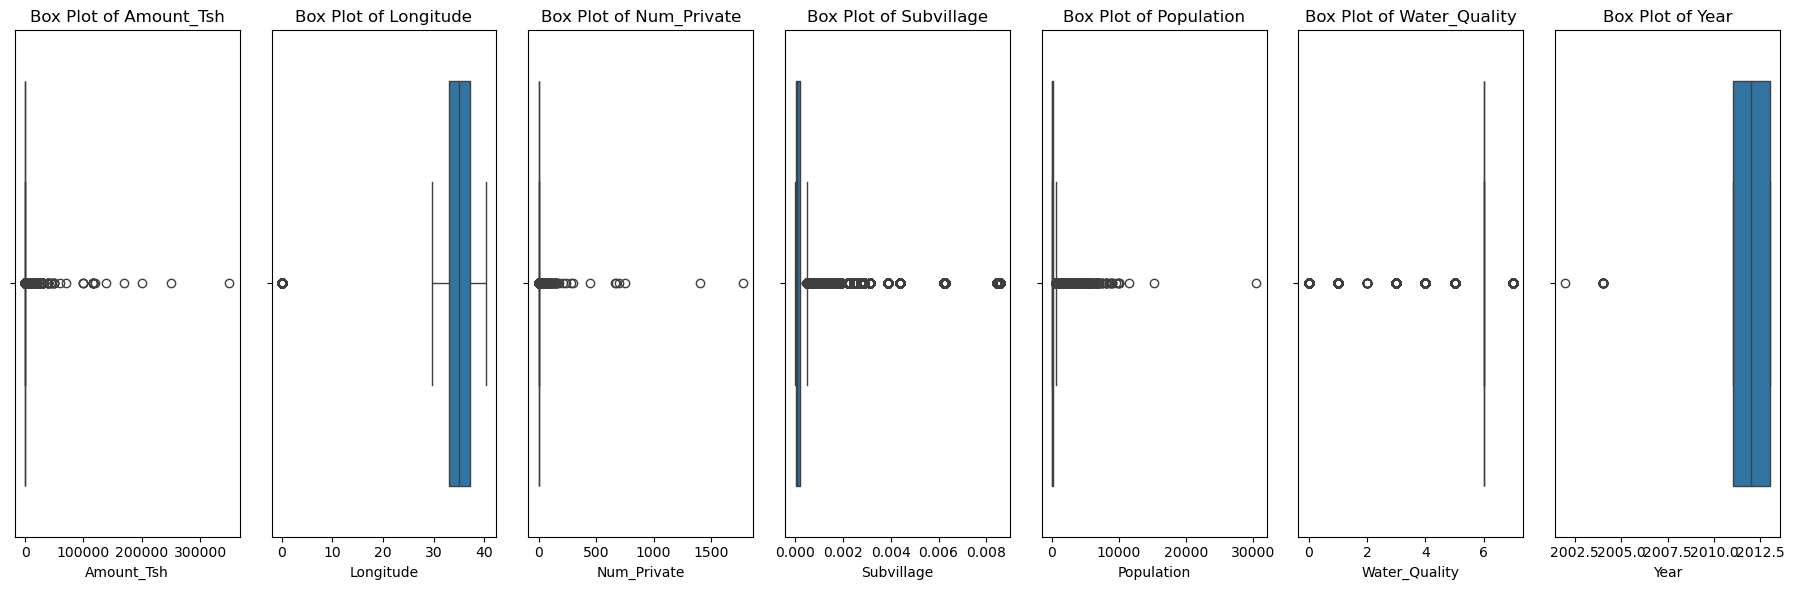

Original DataFrame size: (59400, 30)
Cleaned DataFrame size: (53208, 30)


In [418]:
# Initialize the class
outlier_treatment = OutlierDetectionTreatment(iqr_factor=1.5)

# Detect outliers in the DataFrame
columns_with_outliers = outlier_treatment.detect_outliers_iqr(df_train)

# Print out columns with outliers
print("Columns with outliers:", columns_with_outliers)

# Visualize the outliers using box plots
outlier_treatment.visualize_outliers(df_train, columns_with_outliers)

# Remove outliers from the identified columns
df_cleaned = outlier_treatment.remove_outliers_iqr(df_train, columns_with_outliers)

#  check the size difference to ensure outliers were removed
print(f"Original DataFrame size: {df_train.shape}")
print(f"Cleaned DataFrame size: {df_cleaned.shape}")


About 10.42%% of the train data has been lost after removing the outliers

Columns with outliers: ['Amount_Tsh', 'Longitude', 'Num_Private', 'Subvillage', 'Population', 'Water_Quality', 'Year']


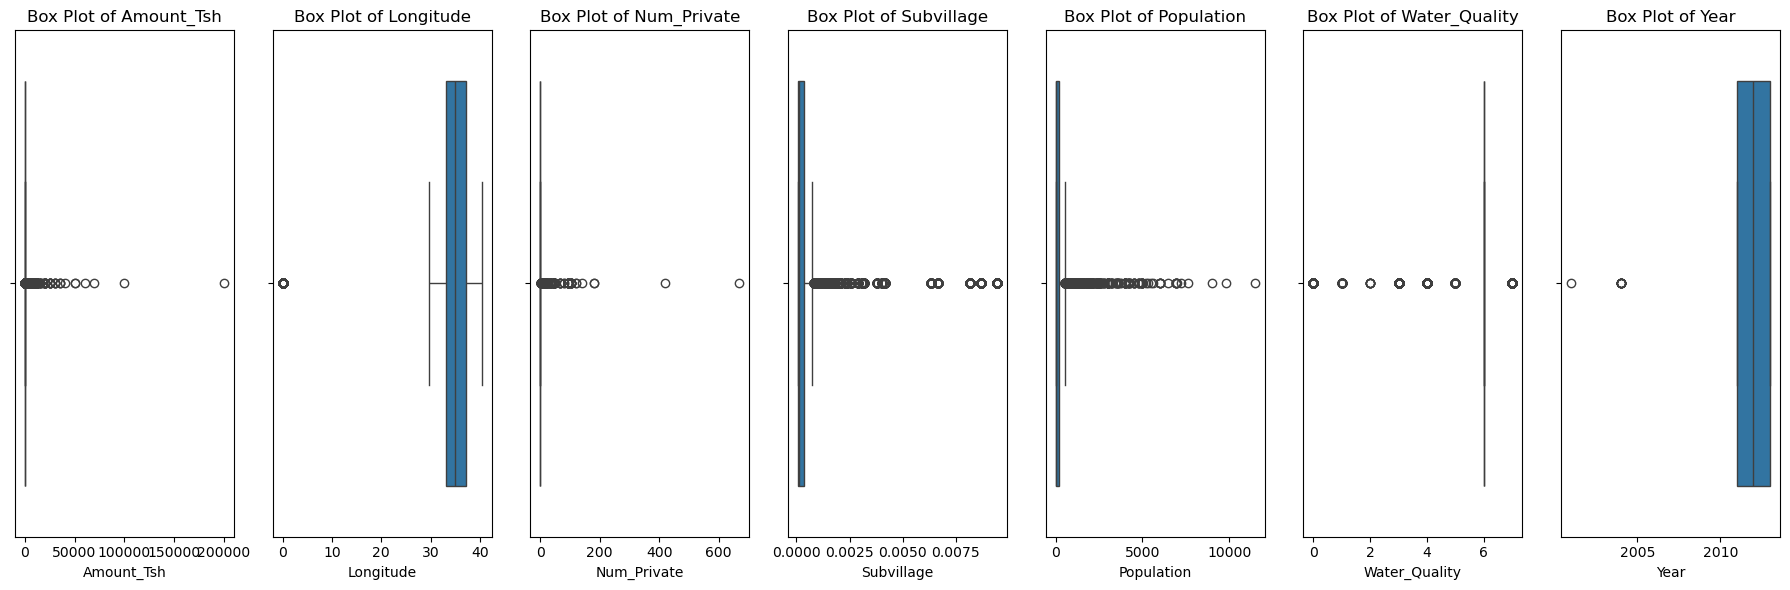

Original DataFrame size: (14850, 30)
Cleaned DataFrame size: (13452, 30)


In [420]:
# Removing outliers present in the test_value
# Detect outliers in the DataFrame
columns_with_outliers = outlier_treatment.detect_outliers_iqr(test_values)

# Print out columns with outliers
print("Columns with outliers:", columns_with_outliers)

# Visualize the outliers using box plots
outlier_treatment.visualize_outliers(test_values, columns_with_outliers)

# Remove outliers from the identified columns
test_values_cleaned = outlier_treatment.remove_outliers_iqr(test_values, columns_with_outliers)

#check the size difference to ensure outliers were removed
print(f"Original DataFrame size: {test_values.shape}")
print(f"Cleaned DataFrame size: {test_values_cleaned.shape}")


About 9.41% of the the test_values is lost after removing the outliers

## 5. Construction_Year seems to have some zeros which is abnormal
The zeros will be replaced with median since median ensures that the replaced values falls somewhere in the middle of the typical range, rather than distorting the data with a potentially inappropriate values

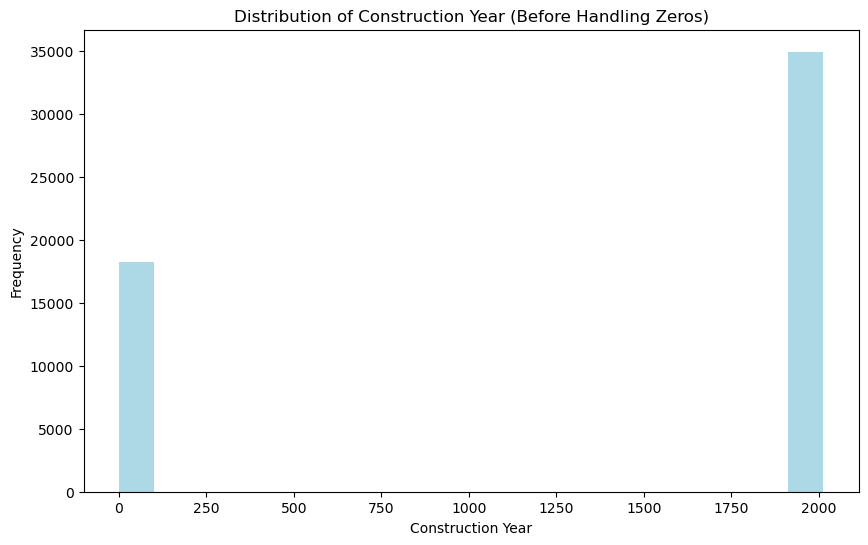

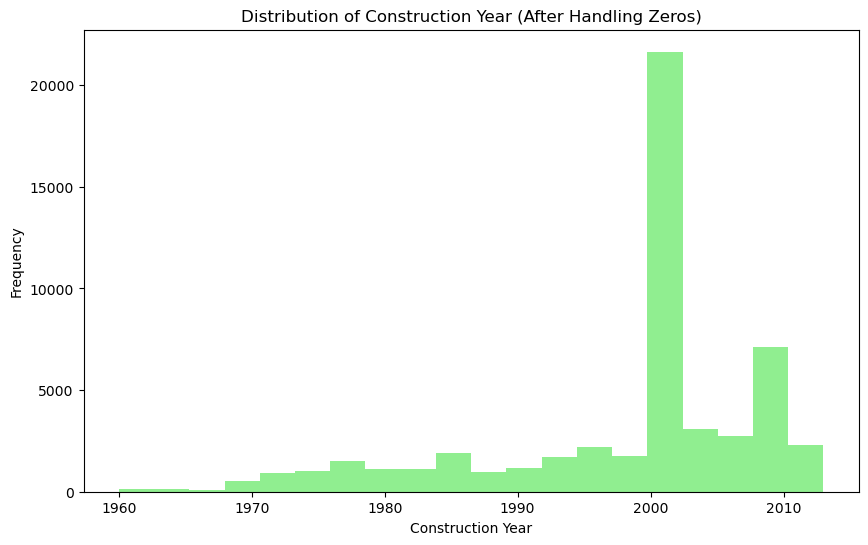

In [423]:
# Dealing with the Construction year of the train data
construction_handler = HandleConstructionYear(df_cleaned)
df_cleaned = construction_handler.handle_zero_construction_year()

#### Observation
The '0's a from the train data are now eliminated from the 'Construction_Year' column

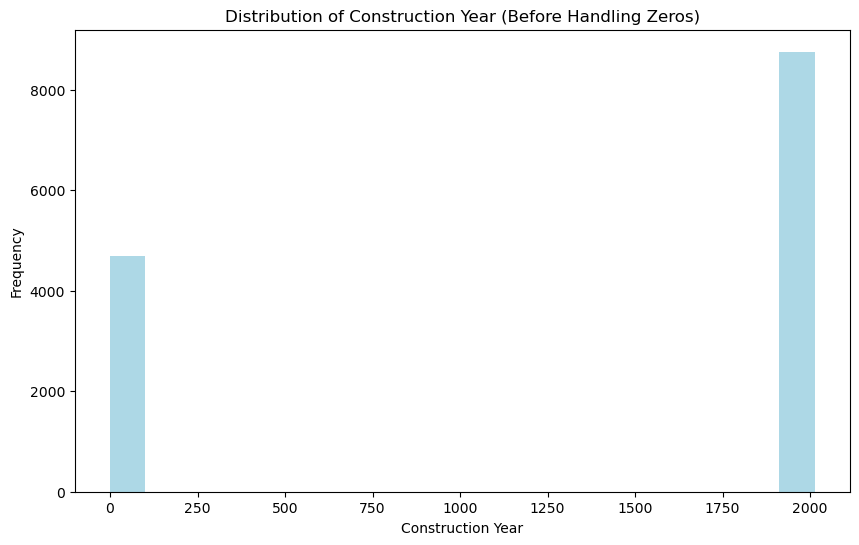

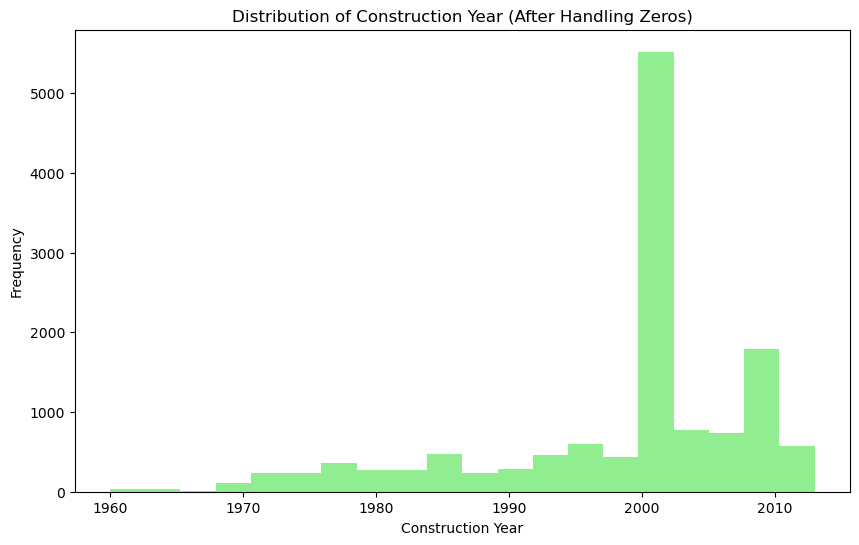

In [425]:
# handling 0 values in 'Construction_Year' in test_values
construction_handler = HandleConstructionYear(test_values_cleaned)
test_values_cleaned = construction_handler.handle_zero_construction_year()

###### Observation
The '0's a from the test data are now eliminated from the 'Construction_Year' column

## 6. Explonatory Data Analysis

### 6.1. Univariate Analysis

In [429]:
# Instantiate the class
univariate = UnivariateEDA(df_cleaned)

#### 6.1.1 Target Distribution: To visualize the distribution of the target variable:

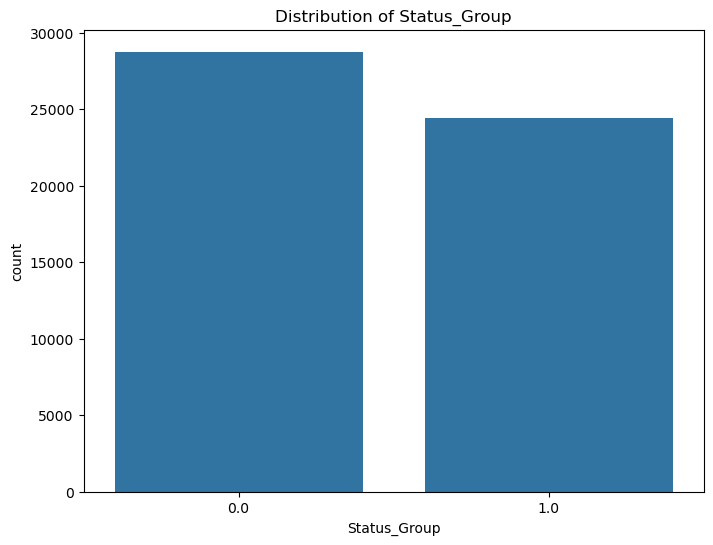

In [431]:
# plot the target variable
univariate.plot_target_distribution(target_column='Status_Group')


The target variable value counts is slightly imbalanced therefore needs to be solved.

#### 6.1.2. Amount_Tsh: Distribution of Amounts, Population and Gps_Height

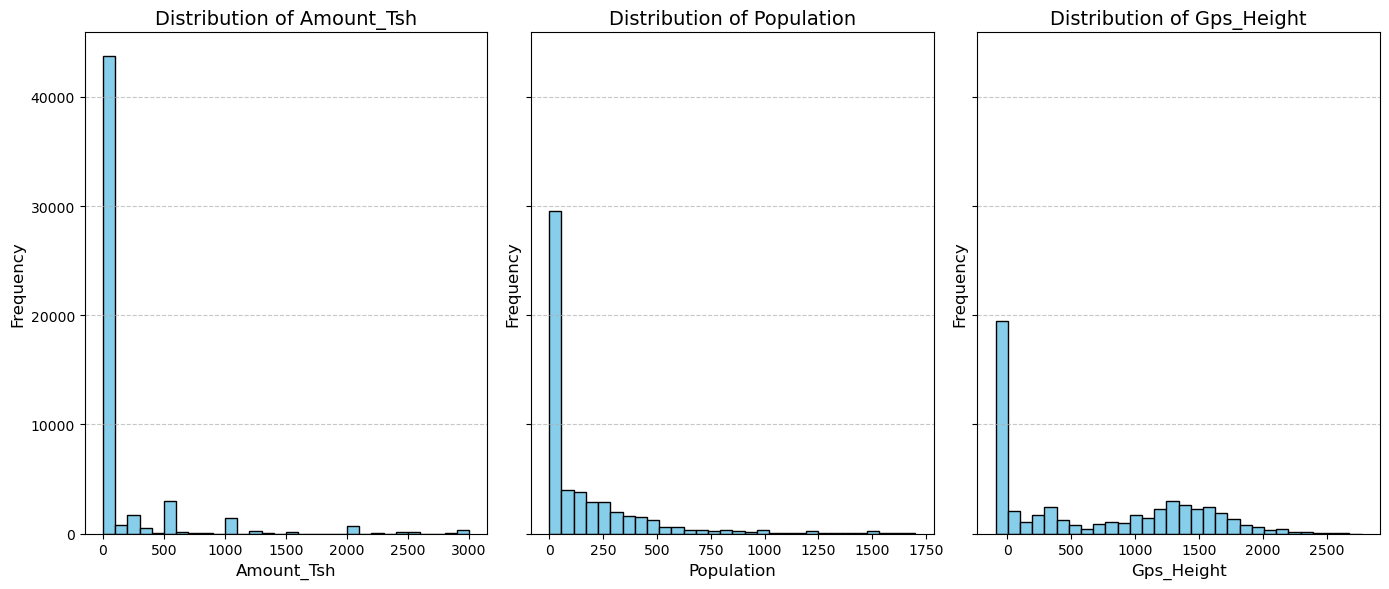

In [434]:
# Visualize the distribution of 'Amount_Tsh', 'Population', 'Gps_Height'
univariate.plot_histograms(['Amount_Tsh', 'Population', 'Gps_Height'])


The 'Amount_Tsh', 'Population' and 'Gps_Height'are among the columns outliers were removed but still their distributions are skewed therefore scaling will be required before modeling.

#### 6.1.3. 'Amount_Tsh', 'Population', 'Gps_Height' to check for outliers

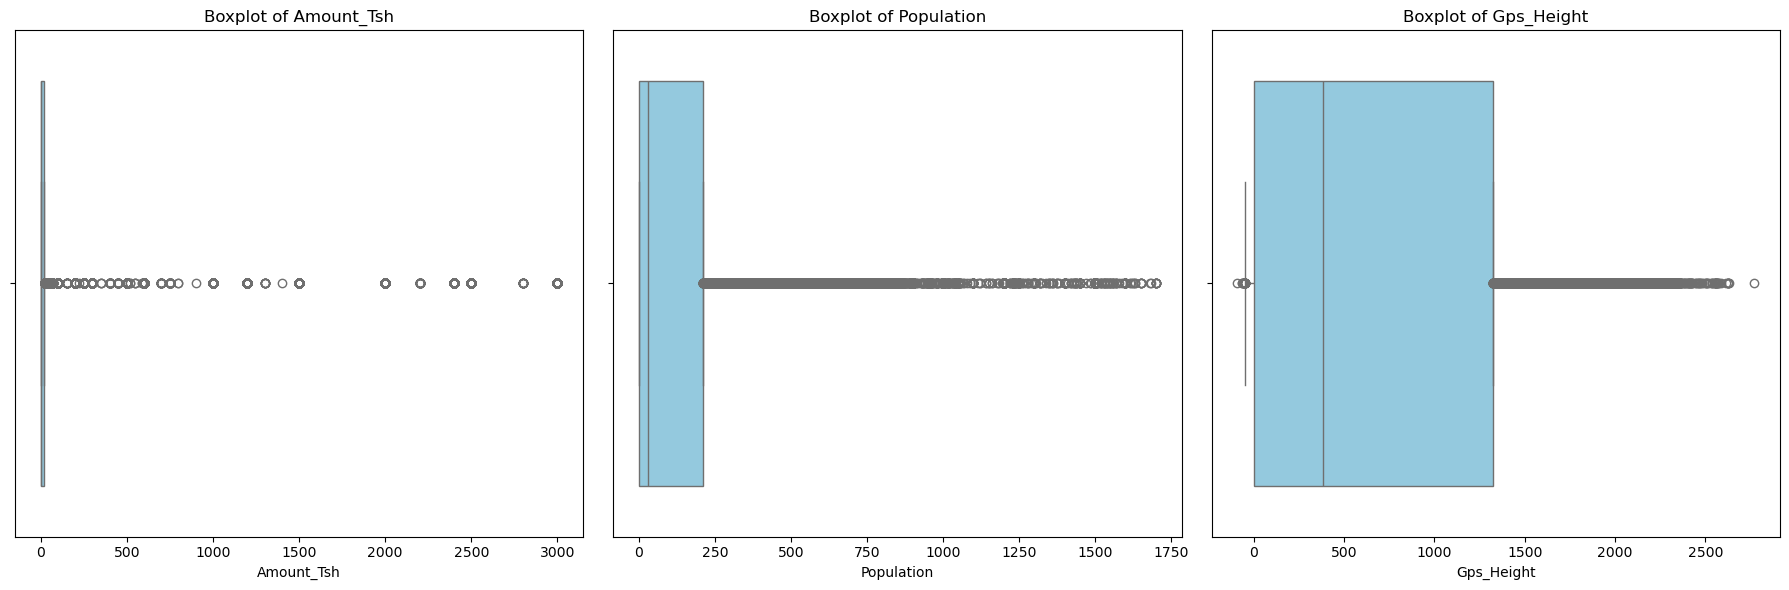

In [437]:
# Call the plot_boxplot method with the selected columns
univariate.plot_boxplot(['Amount_Tsh', 'Population', 'Gps_Height'])


Even after removing the obvious outliers from the dataset, the remaining data still has some outliers. These may not be as extreme as the ones you initially removed, but they can still have a significant impact on your analysis and modeling. This is where log transformation can help.

In [439]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53208 entries, 1 to 59399
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Amount_Tsh         53208 non-null  float64
 1   Funder             53208 non-null  float64
 2   Gps_Height         53208 non-null  int64  
 3   Installer          53208 non-null  float64
 4   Longitude          53208 non-null  float64
 5   Latitude           53208 non-null  float64
 6   Wpt_Name           53208 non-null  float64
 7   Num_Private        53208 non-null  int64  
 8   Basin              53208 non-null  int8   
 9   Subvillage         53208 non-null  float64
 10  Region             53208 non-null  float64
 11  Lga                53208 non-null  float64
 12  Ward               53208 non-null  float64
 13  Population         53208 non-null  int64  
 14  Public_Meeting     53208 non-null  int32  
 15  Permit             53208 non-null  int32  
 16  Construction_Year  53208 no

#### 6.1.4 Log transform all skewed columns
 Check for skewness then proceed to log-transform the columns with significant skewness (greater than 1 or less than -1), particularly:

In [441]:
# Calculate skewness for all numerical columns
skew_values = df_cleaned.select_dtypes(include=['float64', 'int64']).skew()
print(skew_values)


Amount_Tsh           4.270418
Funder               1.271698
Gps_Height           0.441227
Installer            0.621286
Longitude           -0.102234
Latitude            -0.261199
Wpt_Name             3.183565
Num_Private          0.000000
Subvillage           4.531281
Region               0.091481
Lga                  2.147033
Ward                 2.149881
Population           2.624681
Construction_Year   -1.192108
Extraction_Type      0.062841
Year                 0.157767
Month                0.896372
Day                 -0.034430
Status_Group         0.162241
dtype: float64


In [442]:
# Columns to be transformed based on skewness values
columns_to_transform = ['Amount_Tsh', 'Wpt_Name', 'Subvillage', 'Lga', 'Ward']

# Check and transform skewness with threshold 1
df_transformed = univariate.check_and_transform_skewness(threshold=1)

# Print the columns of the transformed DataFrame
print(df_transformed.columns)


Index(['Amount_Tsh', 'Funder', 'Gps_Height', 'Installer', 'Longitude',
       'Latitude', 'Wpt_Name', 'Num_Private', 'Basin', 'Subvillage', 'Region',
       'Lga', 'Ward', 'Population', 'Public_Meeting', 'Permit',
       'Construction_Year', 'Extraction_Type', 'Management',
       'Management_Group', 'Payment_Type', 'Water_Quality', 'Quantity',
       'Source', 'Source_Class', 'Waterpoint_Type', 'Year', 'Month', 'Day',
       'Status_Group'],
      dtype='object')


In [443]:
# Calculate skewness for all numerical columns
skew_values = df_transformed.select_dtypes(include=['float64', 'int64']).skew()
print(skew_values)

Amount_Tsh           1.311728
Funder               1.259627
Gps_Height           0.441227
Installer            0.621286
Longitude           -0.102234
Latitude            -0.261199
Wpt_Name             3.171270
Num_Private          0.000000
Subvillage           4.525191
Region               0.091481
Lga                  2.108854
Ward                 2.146085
Population           0.092843
Construction_Year   -1.204357
Extraction_Type      0.062841
Year                 0.157767
Month                0.896372
Day                 -0.034430
Status_Group         0.162241
dtype: float64


Log transformation is effective for significantly skewed data, particularly when skewness is high (e.g., Amount_Tsh, Population). However, for moderately skewed data (e.g., Wpt_Name, Subvillage), the effect may be less pronounced. Therefore scaling will be required. Num_private will  be dropped.

In [445]:
# drop 'Num_Private' column
df_tranformed = df_transformed.drop(columns =['Num_Private'])

### 6.2. Bivariate Analysis

#### 6.2.1. Correlation Matrix Using Bar plot

In [448]:
# Initialize the BivariateEDA object with the cleaned DataFrame
bivariate = BivariateEDA(df_transformed)


Strong Correlations (>0.3):
Management       Management_Group    0.606816
Waterpoint_Type  Extraction_Type     0.538865
Basin            Longitude           0.529498
Ward             Lga                 0.514539
Extraction_Type  Source              0.489835
Lga              Region              0.473722
Gps_Height       Population          0.450859
Month            Longitude           0.394784
Population       Month               0.373348
Year             Population          0.365073
Lga              Gps_Height          0.355406
Gps_Height       Year                0.350188
Region           Year                0.344880
Extraction_Type  Region              0.331095
Source_Class     Waterpoint_Type     0.328202
Extraction_Type  Gps_Height          0.327077
Wpt_Name         Region              0.326980
Funder           Installer           0.324397
Month            Latitude            0.318793
Source           Region              0.317523
Gps_Height       Wpt_Name            0.316684
Popul

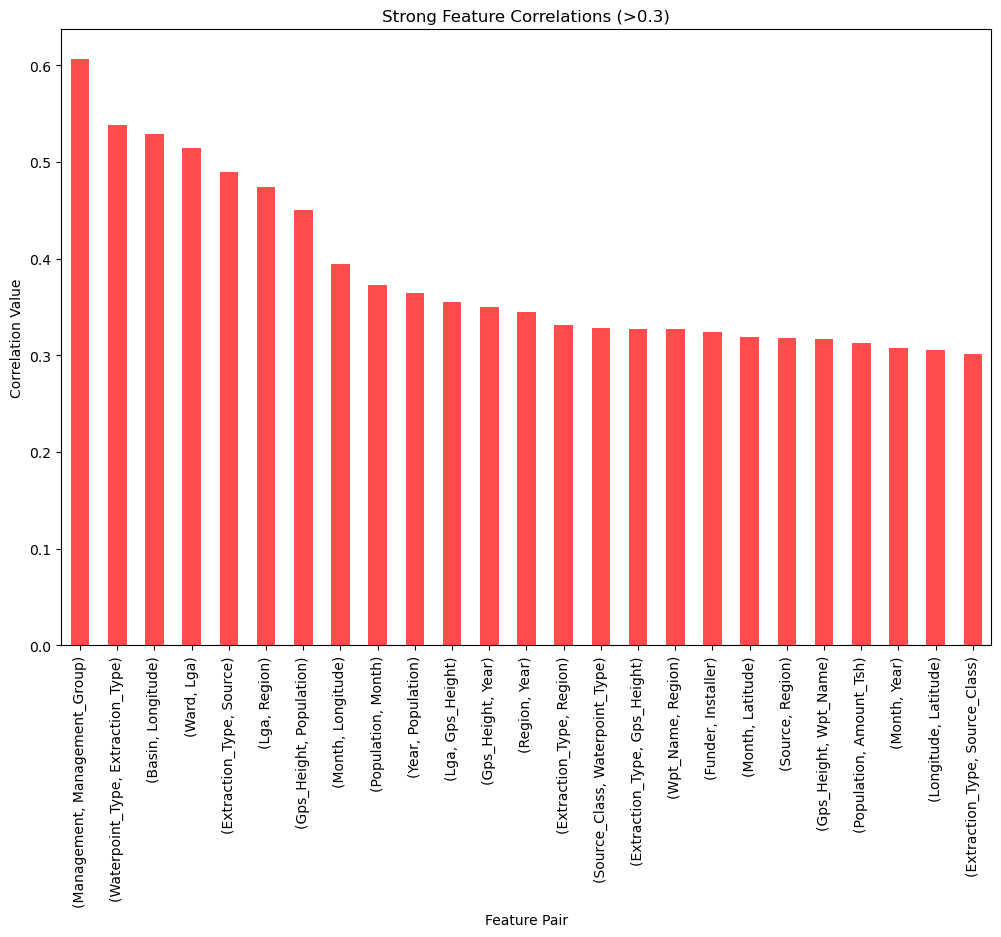

In [449]:
# Plot the sorted correlation matrix using a bar graph
bivariate.plot_sorted_correlation()


Some of these columns seem to be correlated to each other therefore checking for mulitcollinearity using VIF will be necessary for further investigation

#### 6.2.2. Relationship between longitude and latitude using Scatter plot

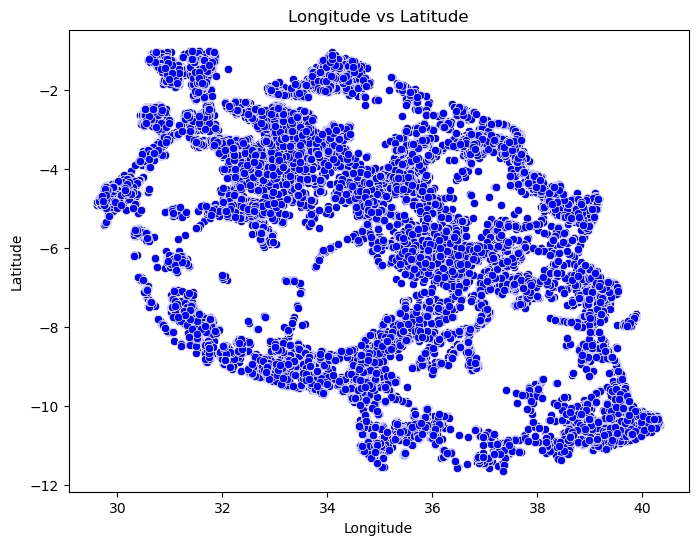

In [452]:
# Call the plot_scatter method to visualize the relationship between 'Longitude' and 'Latitude'
bivariate.plot_scatter(x_column='Longitude', y_column='Latitude')


The scatter plot of Longitude and Latitude reveals a geographic distribution of the data points, potentially indicating clusters or concentrations in specific regions. This could suggest that certain areas have higher occurrences of the wells, which may inform regional patterns or trends that are worth investigating further.

#### 6.2.3. Distribution for 'Waterpoint_Type' based on the 'Status_Group'

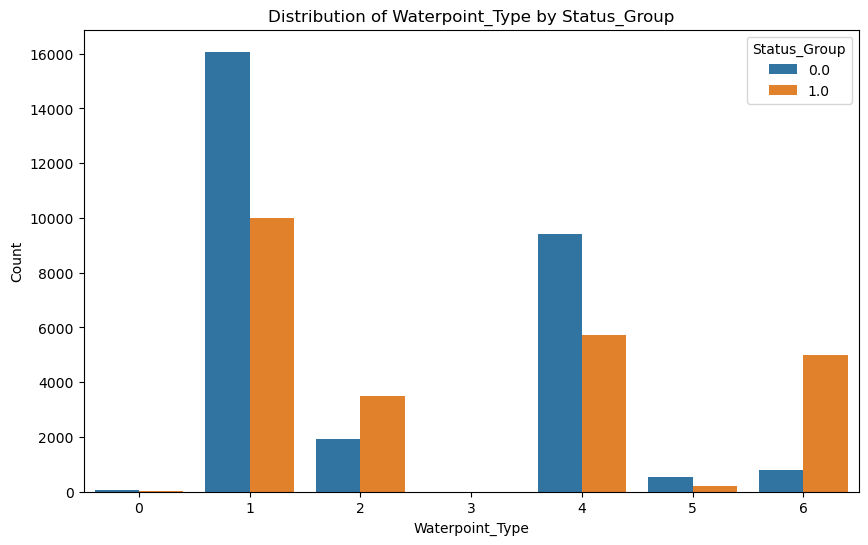

In [455]:
# Call the plot_countplot method to visualize the distribution of 'Waterpoint_Type' by 'Status_Group'
bivariate.plot_countplot(x_column='Waterpoint_Type', hue_column='Status_Group')


Communal standpipe and communal standpipe multiple water standpoints seem to be the highest both the functional wells and the wells that need repair.

#### 6.2.4 visualize how 'Amount_Tsh' is distributed by 'Status_Group'

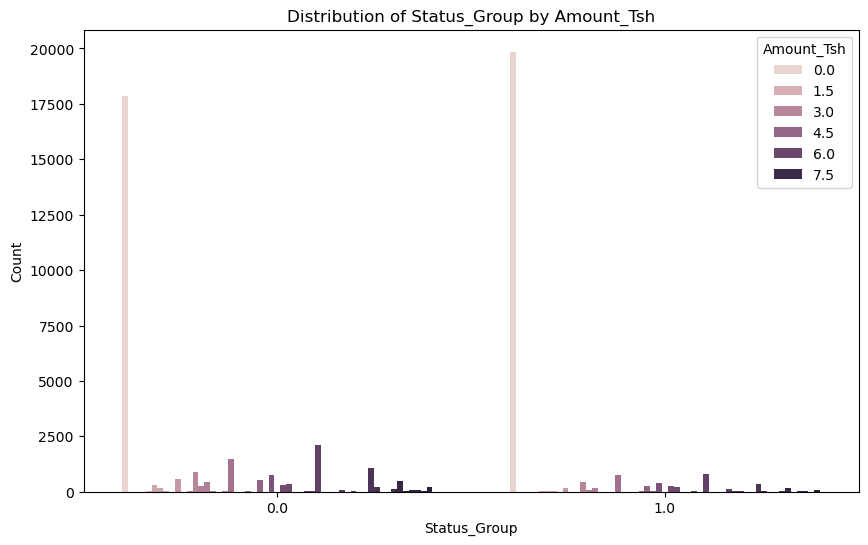

In [458]:
# Call the plot_countplot method to visualize how 'Amount_Tsh' is distributed by 'Status_Group'
bivariate.plot_countplot(x_column='Status_Group',hue_column='Amount_Tsh')

Even though there is high counts of the wells with amounts recorded 0s, generally there is a trend of more expensive wells being  functional than the cheaper ones. 

#### 6.2.5 Feature_importance

In [ ]:
# Call the plot_feature_importance method, passing the target column name
bivariate.plot_feature_importance(target_column='Status_Group')

Only Num_Private will be dropped since it has no use to the model

### 6.3. Multivariate Analysis

#### 6.3.1. Checking Multicollinearity throught VIF

In [ ]:
# Intialize the class
Multivariate = MultivariateEDA(df_transformed)
vif_data = Multivariate.calculate_vif()
print(vif_data)


Most of your features have VIF values between 1 and 2 (e.g., Gps_Height, Longitude, Month, Latitude, etc.), which generally indicates that there is little to no multicollinearity between these features. This is ideal, as these features are not highly correlated with each other therefore will not drop any.

## 7. Feature Engineering
interaction terms were created by multiplying features such as Population and Management_Group to capture their combined effect, and Years_Since_Construction was calculated to represent the age of the waterpoint. Additionally, Construction_Age_Group was created by binning the Years_Since_Construction into categorical age groups, and this categorical feature was encoded numerically using label encoding for use in machine learning models.

In [ ]:
# Initializing the class feature engineering
feature_engineering = FeatureEngineering(df_transformed)
feature_engineering.apply_feature_engineering()
feature_engineering.add_custom_features()

# Get the updated DataFrame with new features
df_feature_engineered = feature_engineering.get_df()

Checking for VIF after feature engineering

In [ ]:
# Intialize the class
Multivariate = MultivariateEDA(df_feature_engineered)
vif_data = Multivariate.calculate_vif()
print(vif_data)

Based on the domain knowledge, feature importance and the correlation, decided to retain the following columns to used for modeling

In [ ]:
# List of columns to retain
columns_to_retain = [
    'Quantity', 'Longitude', 'Latitude', 'Waterpoint_Type', 
    'Gps_Height', 'Construction_Year', 'Subvillage', 'Day', 
    'Ward', 'Population', 'Funder', 'Extraction_Type', 
   'Wpt_Name', 'Amount_Tsh', 'Lga', 'Installer', 'Status_Group'
]

# Creating the cleaned DataFrame with only the columns to retain
df_train_final = df_cleaned[columns_to_retain]

# Display the first few rows of the cleaned DataFrame
df_train_final.info()


## 8. Solve the Class imbalance for the data

Since the Test_vlaues does not have corresponding X_label therefore I will split the train data further to train and test split

In [ ]:
# Initialize the ClassImbalanceSolver with the training dataset and target column
imbalancer = ClassImbalanceSolver(df_train_final, target_column='Status_Group')

# Apply SMOTE to handle class imbalance and get the resampled data
X_train_resampled, y_train_resampled = imbalancer.apply_smote()
# Visualize class distribution before and after SMOTE 
imbalancer.visualize_class_distribution()

## 9. Standardize the data using StandardScaler

In [ ]:
# Initialize the DataScaler with the resampled data (X_train_resampled and X_test)
scaler = DataScaler(X_train_resampled, X_test)

# Scale the data using StandardScaler
X_train_scaled, X_test_scaled = scaler.scale_data()

## 10 .Outputting the dataframes ready for modeling

In [ ]:
# Initialize the OutputPreprocessedData class with the scaled data and labels
outputter = OutputPreprocessedData(
    X_train_scaled, X_test_scaled, 
    y_train_resampled, y_test,  # Resampled y_train and y_test
    output_path="Preprocessed Data/"
)

# Save the data to the output folder
outputter.save_data()